In [1]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [14]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze


maze = gym.make('Maze4-v0')
situation = maze.reset()
maze.render()


■ ■ ■ ■ ■ ■ ■ ■
■ □ □ ■ □ □ $ ■
■ ■ □ □ ■ □ □ ■
■ ■ □ ■ □ □ ■ ■
■ □ □ □ □ □ □ ■
■ ■ □ ■ □ □ □ ■
■ □ A □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■


In [15]:
from lcs.agents.xcs import XCS, Configuration


def xcs_maze_knowledge(population, environment) -> float:
    transitions = environment.env.get_all_possible_transitions()
    nr_correct = 0
    for start, action, end in transitions:
        perception = environment.env.maze.perception(*start)
        if any([True for cl in population
                if cl.does_match(str(perception)) and
                cl.action == action and
                cl.wildcard_number() == 0]):
            nr_correct += 1
    return nr_correct / len(transitions)


def xcs_maze_metrics(xcs: XCS, environment):
    return {
        'numerosity': xcs.population.numerosity(),
        'knowledge': xcs_maze_knowledge(xcs.population, environment),
        'population': len(xcs.population)
    }


cfg = Configuration(number_of_actions=4,
                    max_population=200,
                    user_metrics_collector_fcn=xcs_maze_metrics)

agent = XCS(cfg)
explore_population, explore_metrics = agent.explore(maze, 1000, False)

for cl in explore_population:
    print(str(cl))


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': 1.564973463222846e-40, 'numerosity': 36, 'knowledge': 0.0, 'population': 28}


INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 9, 'reward': 100.00000000401786, 'numerosity': 120, 'knowledge': 0.0, 'population': 104}


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 50, 'reward': 1.4384369962701781e-46, 'numerosity': 120, 'knowledge': 0.0, 'population': 104}


INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 2, 'reward': 100.0, 'numerosity': 128, 'knowledge': 0.0, 'population': 104}


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 50, 'reward': 1.0098205197387406e-53, 'numerosity': 128, 'knowledge': 0.0, 'population': 104}


INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 9, 'reward': 100.0, 'numerosity': 128, 'knowledge': 0.0, 'population': 104}


INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 9, 'reward': 100.0, 'numerosity': 128, 'knowledge': 0.0, 'population': 104}


INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 9, 'reward': 100.0, 'numerosity': 128, 'knowledge': 0.0, 'population': 104}


INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 50, 'reward': 1.319415202664306e-65, 'numerosity': 128, 'knowledge': 0.0, 'population': 104}


INFO:lcs.agents.Agent:{'trial': 900, 'steps_in_trial': 6, 'reward': 100.0, 'numerosity': 128, 'knowledge': 0.0, 'population': 104}


Cond:00100010 - Act:3 - Num:1 [fit: 0.030, exp: 13.00, pred: 6.699640]
Cond:00100010 - Act:2 - Num:1 [fit: 0.049, exp: 16.00, pred: 8.310213]
Cond:00100010 - Act:1 - Num:1 [fit: 0.000, exp: 62.00, pred: 16.692233]
Cond:00100010 - Act:0 - Num:1 [fit: 0.038, exp: 15.00, pred: 8.424271]
Cond:10011100 - Act:3 - Num:1 [fit: 0.020, exp: 17.00, pred: 6.277469]
Cond:10011100 - Act:2 - Num:1 [fit: 0.013, exp: 14.00, pred: 8.018389]
Cond:10011100 - Act:1 - Num:1 [fit: 0.000, exp: 80.00, pred: 13.274980]
Cond:10011100 - Act:0 - Num:1 [fit: 0.020, exp: 17.00, pred: 7.629433]
Cond:00010010 - Act:3 - Num:1 [fit: 0.007, exp: 27.00, pred: 11.504957]
Cond:00010010 - Act:2 - Num:1 [fit: 0.007, exp: 27.00, pred: 11.679740]
Cond:00010010 - Act:1 - Num:1 [fit: 0.003, exp: 35.00, pred: 18.445567]
Cond:00010010 - Act:0 - Num:1 [fit: 0.000, exp: 115.00, pred: 19.344857]
Cond:00001000 - Act:3 - Num:1 [fit: 0.022, exp: 9.00, pred: 0.001055]
Cond:00001000 - Act:2 - Num:1 [fit: 0.009, exp: 17.00, pred: 0.003024]


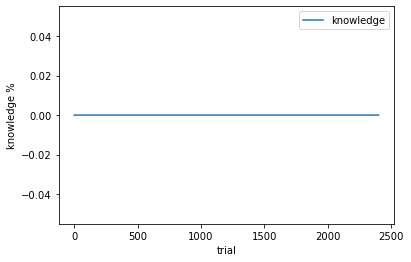

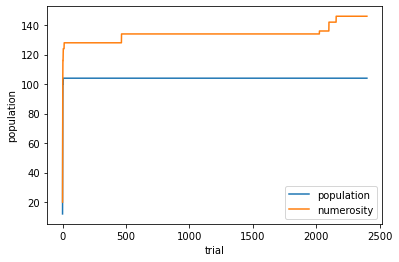

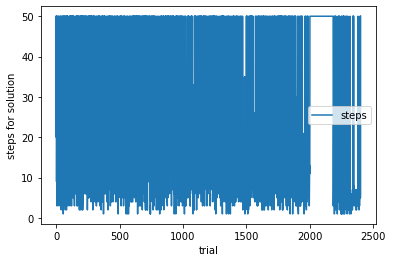

In [7]:
import pandas as pd

df = pd.DataFrame([metric["knowledge"] for metric in explore_metrics] +
                  [metric["knowledge"] for metric in exploit_metrics])
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("knowledge %")
ax.legend(["knowledge"])

df = pd.DataFrame(zip(
                [metric["population"] for metric in explore_metrics] +
                [metric["population"] for metric in exploit_metrics],
                [metric["numerosity"] for metric in explore_metrics] +
                [metric["numerosity"] for metric in exploit_metrics]
                ))
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["population", "numerosity"])

df = pd.DataFrame([metric["steps_in_trial"] for metric in explore_metrics] +
                  [metric["steps_in_trial"] for metric in exploit_metrics])
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps for solution")
ax.legend(["steps"])



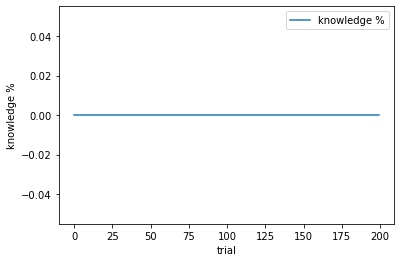

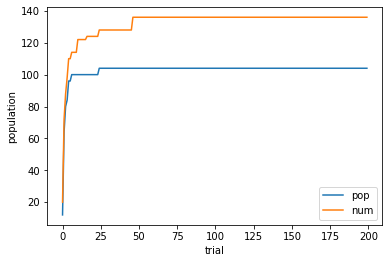

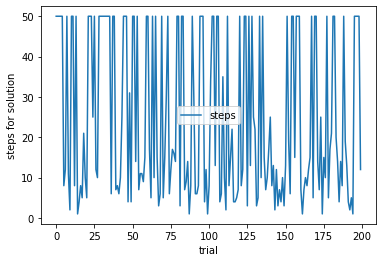

In [ ]:
import pandas as pd

df = pd.DataFrame(metric["knowledge"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("knowledge %")
ax.legend(["knowledge %"])


df = pd.DataFrame(zip([metric["population"] for metric in explore_metrics], [metric["numerosity"] for metric in explore_metrics]))
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["pop", "num"])

df = pd.DataFrame(metric["steps_in_trial"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps for solution")
ax.legend(["steps"])
